## Treinamento do modelo de Regressão

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import setup


In [2]:
from processamento_dados import load_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATAFRAME_PATH = os.path.join('..','data', 'teste_indicium_precificacao_final.csv')
df = load_data(DATAFRAME_PATH)


#### Divisão da base em treinamento e teste

In [4]:

Y = df['price'].to_numpy()
X = df.drop(columns=['price']).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Modelo xgboost baseado em árvores de decisão

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 20)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, preds)
print("MSE: %f" % (mse))

mae = abs(y_test - preds).mean()
print("MAE: %f" % (mae))

# Avaliando Mean Square (MSE) Error e Mean Absolute Error (MAE)


MSE: 52082.019531
MAE: 72.055364


#### Modelo redes neurais

In [6]:
from sklearn.neural_network import MLPRegressor
import joblib

# Define the models to be tested
models = [
    MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, verbose=False, early_stopping=True, activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.01, validation_fraction=0.1),
    MLPRegressor(hidden_layer_sizes=(300, 500), max_iter=1000, verbose=False, early_stopping=True, activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.01, validation_fraction=0.1),
    MLPRegressor(hidden_layer_sizes=(500, 500), max_iter=1000, verbose=False, early_stopping=True, activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.01, validation_fraction=0.1)
]

best_model = None
best_rmse = float('inf')

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model in models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    print(f"Model: {model}, MSE: {mse}")
    
    if mse < best_rmse:
        best_rmse = mse
        best_model = model

print(f"Best Model: {best_model}, Best MSE: {best_rmse}")

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

Model: MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000), MSE: 52059.42818710395
Model: MLPRegressor(early_stopping=True, hidden_layer_sizes=(300, 500),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000), MSE: 51539.6748387996
Model: MLPRegressor(early_stopping=True, hidden_layer_sizes=(500, 500),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000), MSE: 51500.58968962662
Best Model: MLPRegressor(early_stopping=True, hidden_layer_sizes=(500, 500),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000), Best MSE: 51500.58968962662


['best_model.pkl']

In [7]:
# Avaliando Mean Square (MSE) Error e Mean Absolute Error (MAE)
MAE = abs(predictions - y_test).mean()
print(f"MAE: {MAE}")
print("MSE: %f" % (mse))

MAE: 65.30846789708735
MSE: 51500.589690


#### Obtendo as piores previsões

In [8]:
worst = abs(y_test - predictions).argsort()[-10:][::-1]
print("Worst predictions:")
print(y_test[worst])
print(predictions[worst])


Worst predictions:
[ 9999  9999 10000  5100  3800  4000  3210  3000  2500  2000]
[139.25012566 139.55349833 276.14245794 340.17580796 272.63394465
 480.14401383 417.51800429 536.46108657 218.01651815  80.43505586]


#### Histograma dos erros

Total count: 9777


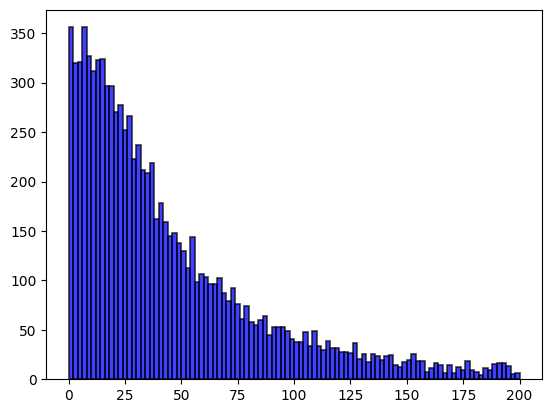

In [9]:
errors = abs(y_test - predictions)
print(f"Total count: {len(errors)}")
plt.hist(errors, bins=100, range=(0, 200), alpha=0.75, color='b', edgecolor='black', linewidth=1.2)
plt.show()


#### Modelo KNN regressor

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: %f" % (mse))

mae = abs(y_test - predictions).mean()
print("MAE: %f" % (mae))

# Avaliando Mean Square (MSE) Error e Mean Absolute Error (MAE)


MSE: 56254.724108
MAE: 85.420666
